<a href="https://colab.research.google.com/github/Gabriele90/Biohacker90/blob/main/The_Best_Machine_Learning_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**How To Choose The Best Machine Learning Algorithm For A Particular Problem**

Choosing the right algorithm is linked up with the problem statement. It can save both money and time. So, it is important to know what type of problem we are dealing with. 

In this article, we will be discussing the key techniques that can be used to choose the right machine algorithm in a particular work. Through this article, we will discuss how we can decide to use which machine learning model using the plotting of dataset properties. We will also discuss how the size of the dataset can be a considerable measure in choosing a machine learning algorithm.

**Visualization of Data**

First of all, we will import the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv("proteinase_bioactivity_data_3class_pIC50.csv")
df.head(5)

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,5.142668
1,1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,5.026872
2,2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
4,4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,5.698970


**Pair Plot Method**

By applying the pair plot we will be able to understand which algorithm to choose.

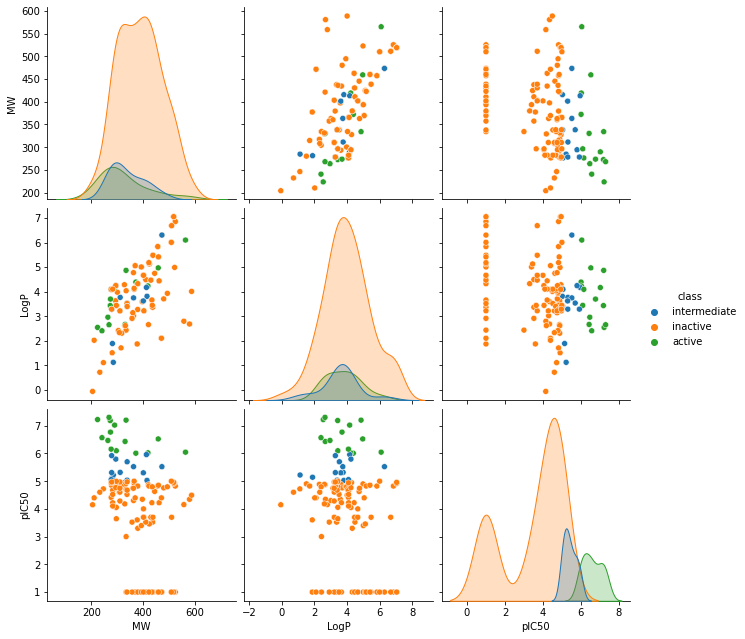

In [5]:
sb.pairplot(data=df[['class' ,'MW','LogP', 'pIC50']], hue='class', dropna=True, height=3)

**Size of Training Data & Training Time**

Import the various algorithm classifiers to check the training time of small and large dataset.

In [6]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [7]:
feature = ['MW',	'LogP',	'NumHDonors',	'NumHAcceptors',	'pIC50']
X = df[feature] 
y = df["class"]

**Split the data into train and test**

Now we can proceed by applying Decision Tree, Logistic Regression, Random Forest and Support Vector Machine algorithms to check the training time for a classification problem.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Now, we will fit several machine learning models on this dataset and check the training time taken by these models.

In [9]:
import time
clf = DecisionTreeClassifier()
start = time.time()
clf = clf.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.0027704238891601562s


In [10]:
from sklearn.linear_model import LogisticRegression
import time
clf = LogisticRegression(random_state = 0) 
start = time.time()
clf.fit(X_train,y_train) 
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.04926466941833496s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [11]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
start = time.time()
clf.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.14264559745788574s


In [12]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
start = time.time() 
# fitting x samples and y classes 
clf.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.17513179779052734s


**Comparing Classifiers for Building Classification Models**

Import modules

In [13]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

Defining learning classifiers

In [14]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

Build Model, Apply Model on Test Data & Record Accuracy Score

In [17]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

In [18]:
scores

[0.8,
 0.85,
 0.825,
 0.825,
 0.825,
 1.0,
 1.0,
 0.95,
 1.0,
 0.825,
 1.0,
 0.925,
 0.85,
 0.825]

Analysis of Model Performance

In [19]:
import pandas as pd
import seaborn as sns

In [20]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Nearest_Neighbors,0.800
1,Linear_SVM,0.850
2,Polynomial_SVM,0.825
3,RBF_SVM,0.825
4,Gaussian_Process,0.825
5,Gradient_Boosting,1.000
6,Decision_Tree,1.000
7,Extra_Trees,0.950
8,Random_Forest,1.000
9,Neural_Net,0.825


In [23]:
cm = sns.light_palette("red", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.800000
1,Linear_SVM,0.850000
2,Polynomial_SVM,0.825000
3,RBF_SVM,0.825000
4,Gaussian_Process,0.825000
5,Gradient_Boosting,1.000000
6,Decision_Tree,1.000000
7,Extra_Trees,0.950000
8,Random_Forest,1.000000
9,Neural_Net,0.825000


Bar plot of model performanc

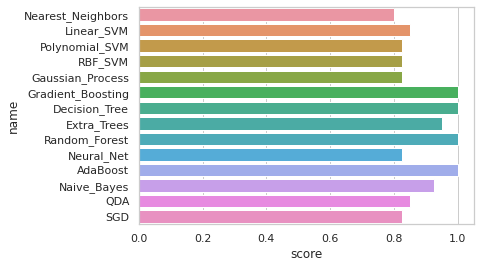

In [22]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)